In [1]:
# IMPORTAÇÃO DE BIBLIOTECAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CRIAÇÃO DA VARIÁVEL QUE VAI RECEBER OS DADOS

df = pd.read_csv("../data/oge.csv",
                 sep=',',
                 decimal=',',
                 thousands='.')

In [3]:
# VER AS PRIMEIRAS 5 LINHAS

df.head()

,province,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Bengo,2.582883e+10,3.333705e+10,3.514008e+10,7.872297e+10,3.437366e+10,4.194801e+10,4.717140e+10,5.353984e+10,5.413356e+10,6.207004e+10,7.852776e+10,9.604986e+10,1.011177e+11
1,Benguela,6.472897e+10,8.677158e+10,9.002622e+10,1.460131e+11,9.088679e+10,9.487624e+10,1.003819e+11,1.245789e+11,1.486222e+11,2.050272e+11,2.454249e+11,2.933738e+11,2.610441e+11
2,Bié,3.371833e+10,5.352100e+10,6.274170e+10,8.977728e+10,6.568271e+10,7.817241e+10,7.124886e+10,7.549584e+10,2.516878e+11,1.789109e+11,1.216268e+11,1.815689e+11,1.719916e+11
3,Cabinda,4.597152e+10,4.865888e+10,5.208143e+10,6.958518e+10,5.684444e+10,9.961792e+10,6.662272e+10,8.054588e+10,9.063506e+10,9.413272e+10,2.398168e+11,4.883933e+11,1.796477e+11
4,Cuando Cubango,2.810680e+10,3.803116e+10,6.217211e+10,1.062548e+11,5.853824e+10,3.533525e+10,4.379033e+10,7.603224e+10,6.312952e+10,5.921093e+10,7.700050e+10,1.090234e+11,1.138555e+11


In [4]:
# TORNAR A COLUNA 'province' ÍNDICE

# df.set_index('province', inplace=True)

In [5]:
# CONVERTER EM WIDE

df_long = df.melt(
    id_vars="province",
    var_name="year",
    value_name="value"
)


In [6]:
# REMOVER LINHAS SEM VALOR

df_long = df_long.dropna(subset=["value"])

In [7]:
# FILTRAR APENAS PROVÍNCIAS

excluir = (
    "Dívida Pública",
    "Estrutura Central",
    "Exterior"
)

df_long = df_long[~df_long["province"].isin(excluir)]

In [8]:
# CONVERTER ANO PARA INTEIRO

df_long["year"] = df_long["year"].astype(int)

In [9]:
# CRIAR MATRIZ PARA O HEATMAP

heatmap_data = df_long.pivot(
    index="province",
    columns="year",
    values="value"
)

Text(145.22222222222223, 0.5, 'PROVÍNCIA')

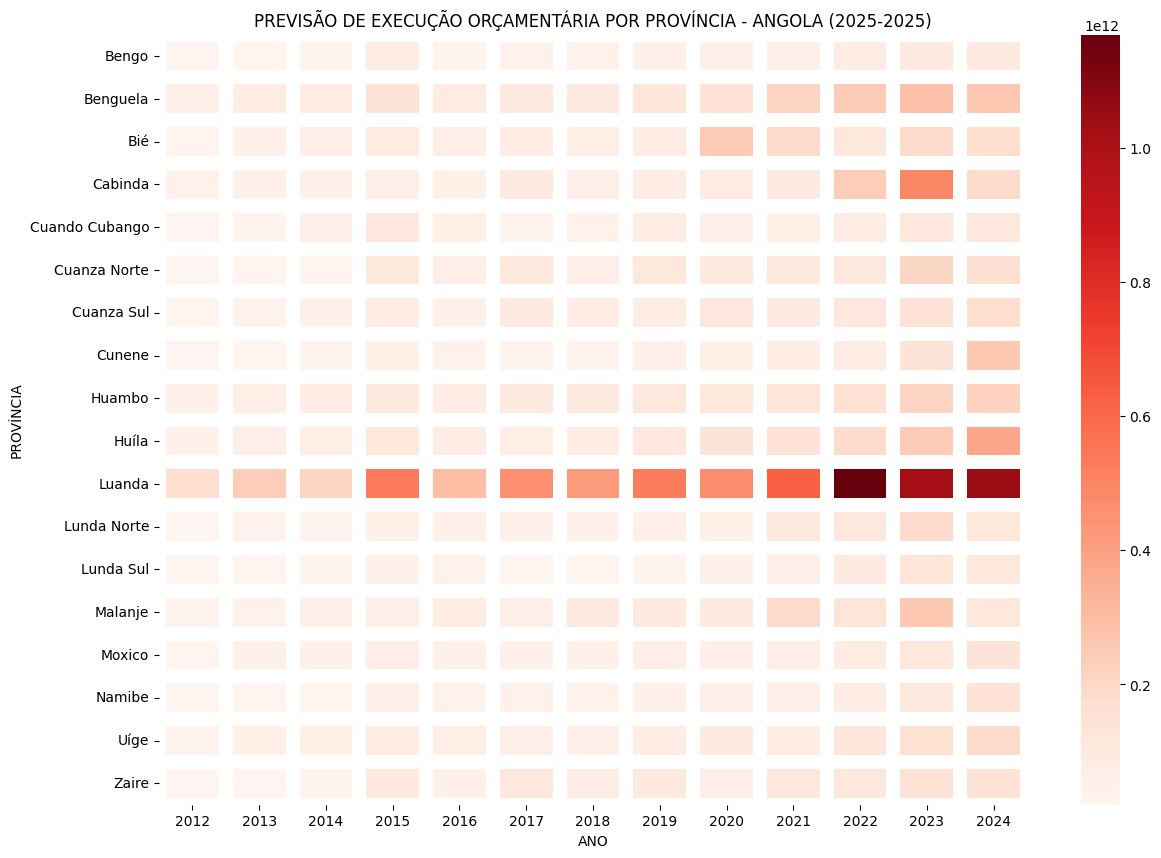

In [10]:
# CRIAR HEATMAP

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=10
)

plt.title("PREVISÃO DE EXECUÇÃO ORÇAMENTÁRIA POR PROVÍNCIA - ANGOLA (2025-2025)")
plt.xlabel("ANO")
plt.ylabel("PROVÍNCIA")

In [11]:
# CRIAR NOVO DATASET COM OS VALORES TOTAIS RECEBEDIDOS DE 2012 A 2024 POR CADA PROVÍNCIA 
# DIMINUINDO O AS ULTIMAS 12 CASAS DECIMAIS DO TOTAL DE CADA PROVÍNCIA

df_totals = df_long.groupby("province")["value"].sum().reset_index()
df_totals["value"] = df_totals["value"] // 1e9
df_totals = df_totals.sort_values(by="value", ascending=True)
df_totals.rename(columns={"value": "total_value_billion"}, inplace=True)
df_totals.to_csv("../data/oge_provincias_total.csv", index=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_11356\2592078724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


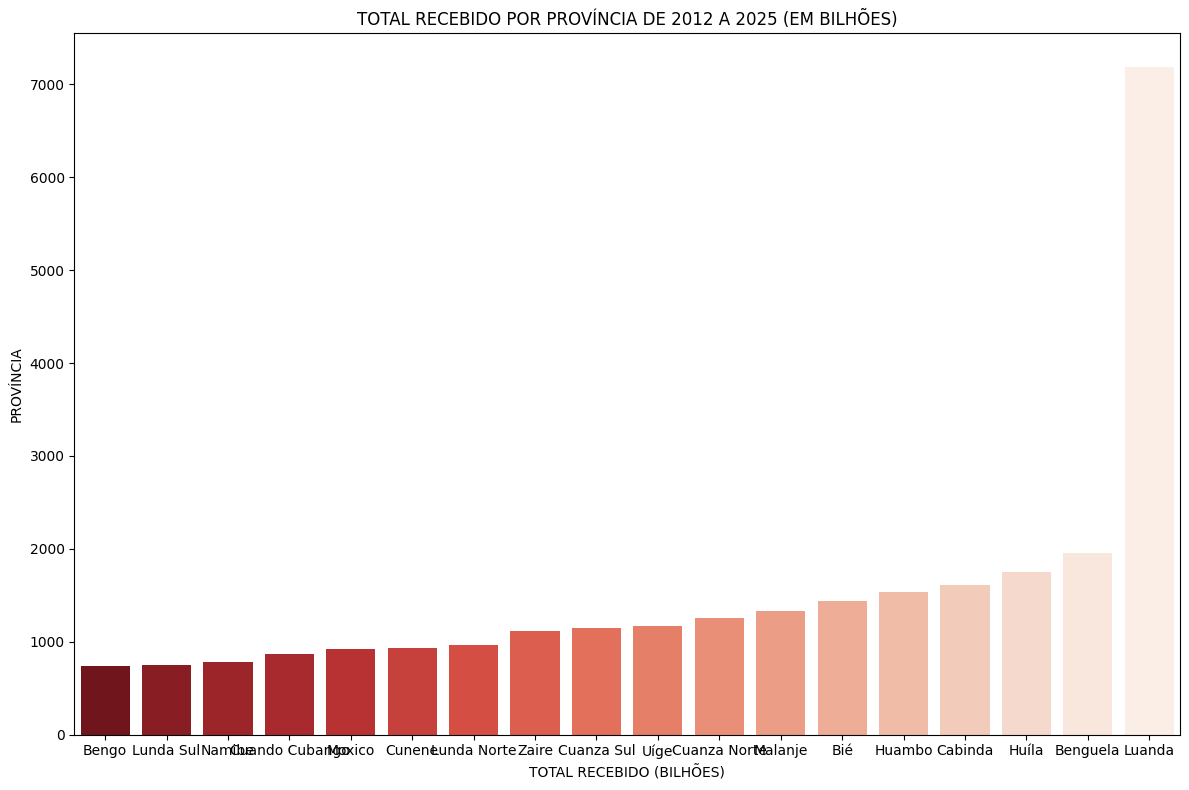

In [12]:
# CRIAR GRÁFICO PARA df_totals

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_totals,
    x="province",
    y="total_value_billion",
    palette="Reds_r"
)
plt.title("TOTAL RECEBIDO POR PROVÍNCIA DE 2012 A 2025 (EM BILHÕES)")
plt.xlabel("TOTAL RECEBIDO (BILHÕES)")
plt.ylabel("PROVÍNCIA")
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_11356\3159478949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_luanda["value"] = df_luanda["value"] // 1e9
C:\Users\dell\AppData\Local\Temp\ipykernel_11356\3159478949.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


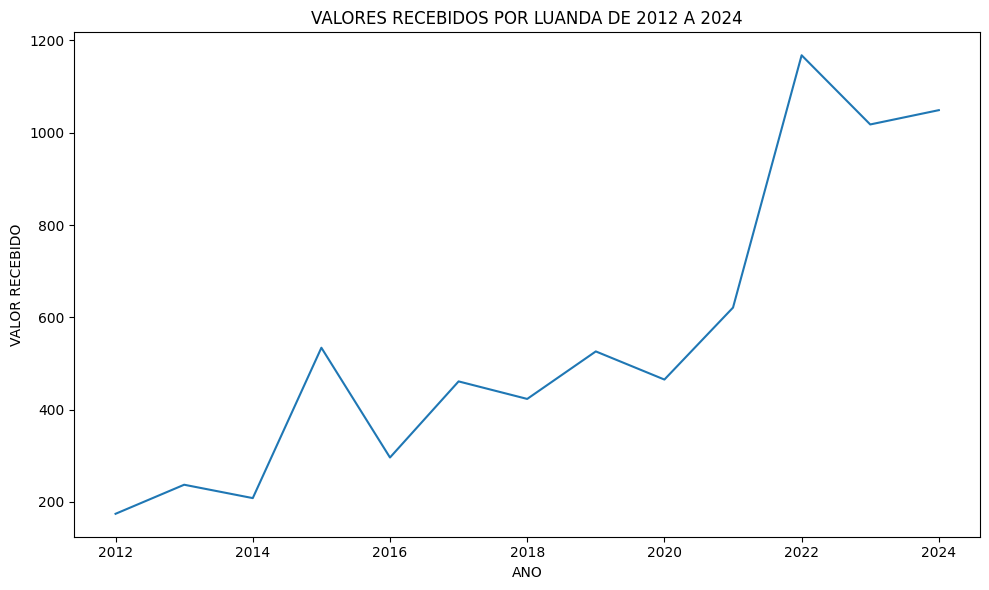

In [13]:
# DATASET NOVO APENAS COM OS VALORES RECEDEBIDOS POR LUANDA DE 2012 A 2024, DIVIDIR O VALOR DE CADA ANO POR 1E9

df_luanda = df_long[df_long["province"] == "Luanda"]
df_luanda["value"] = df_luanda["value"] // 1e9
df_luanda.to_csv("../data/oge_luanda_2012_2024.csv", index=False)
    
# CRIAR GRÁFICO PARA df_luanda
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_luanda,
    x="year",
    y="value",
    palette="Reds_r"
)
plt.title("VALORES RECEBIDOS POR LUANDA DE 2012 A 2024")
plt.xlabel("ANO")
plt.ylabel("VALOR RECEBIDO")
plt.tight_layout()
plt.show()

In [14]:
# CALCULAR QUANTOS POR CENTO DO OGE DAS PROVINCIAS É DESTINADO A LUANDA

df_luanda = df_long[df_long["province"] == "Luanda"]

total_oge_provincias = df_long["value"].sum()
total_oge_luanda = df_luanda["value"].sum()

percent_luanda = (total_oge_luanda / total_oge_provincias) * 100
print(f"Percentagem do OGE destinado a Luanda: {percent_luanda:.2f}%")


Percentagem do OGE destinado a Luanda: 26.14%


In [15]:
# DESCOBRIR A PROVÍNCIA QUE RECEBEU MENOS RECURSOS ENTRE 2012 E 2024

df_totals = df_long.groupby("province")["value"].sum().reset_index()
df_totals = df_totals.sort_values(by="value", ascending=True)
province_least_funded = df_totals.iloc[0]
print(f"A província que recebeu menos recursos entre 2012 e 2024 foi {province_least_funded['province']} com um total de {province_least_funded['value']:.2f}.")

A província que recebeu menos recursos entre 2012 e 2024 foi Bengo com um total de 741960774097.00.


In [16]:
# CRIAR NOVO CSV COM OS VALORES RECEBIDOS PELO BENGO AO LONGO DOS ANOS 2012 A 2024 COM OS VALORES NA ESCALA DE 10^9

df_bengo = df_long[df_long["province"] == "Bengo"]
df_bengo["value"] = df_bengo["value"] // 1e9
df_bengo.to_csv("../data/oge_bengo_2012_2024.csv", index=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_11356\502437432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bengo["value"] = df_bengo["value"] // 1e9


In [17]:
# CALCULAR QUANTOS POR CENTO DO OGE DAS PROVINCIAS É DESTINADO A PROVÍNCIA DO BENGO

df_bengo = df_long[df_long["province"] == "Bengo"]

total_oge_provincias = df_long["value"].sum()
total_oge_bengo = df_bengo["value"].sum()

percent_bengo = (total_oge_bengo / total_oge_provincias) * 100
print(f"Percentagem do OGE destinado ao Bengo: {percent_bengo:.2f}%")

Percentagem do OGE destinado ao Bengo: 2.70%


In [18]:
# CRIAR MAPEAMENTO DE PROVÍNCIAS PARA REGIÕES

regioes = {
    "Cabinda": "Norte",
    "Zaire": "Norte",
    "Uíge": "Norte",
    "Lunda Norte": "Norte",

    "Lunda Sul": "Leste",
    "Moxico": "Leste",

    "Namibe": "Sul",
    "Huíla": "Sul",
    "Cunene": "Sul",
    "Cuando Cubango": "Sul",

    "Malanje": "Centro",
    "Bié": "Centro",
    "Huambo": "Centro",

    "Bengo": "Oeste",
    "Cuanza Norte": "Oeste",
    "Luanda": "Oeste",
    "Cuanza Sul": "Oeste",
    "Benguela": "Oeste"
}

# ATRIBUIR REGIÃO A CADA PROVÍNCIA
df_long["region"] = df_long["province"].map(regioes)

# REMOVER PROVÍNCIAS NÃO MAPEADAS (SEGURANÇA)
df_regions = df_long.dropna(subset=["region"])

# AGREGAR VALORES POR REGIÃO E ANO
df_regions_year = (
    df_regions
    .groupby(["region", "year"])["value"]
    .sum()
    .reset_index()
)

# CRIAR DATASET COM TOTAL POR REGIÃO (2012–2024)
df_regions_total = (
    df_regions_year
    .groupby("region")["value"]
    .sum()
    .reset_index()
)

# CONVERTER PARA BILHÕES
df_regions_total["value"] = df_regions_total["value"] // 1e9
df_regions_total.rename(columns={"value": "total_value_billion"}, inplace=True)

# ORDENAR
df_regions_total = df_regions_total.sort_values(
    by="total_value_billion",
    ascending=True
)

# EXPORTAR
df_regions_total.to_csv("../data/oge_regioes_total.csv", index=False)

df_regions_total


,region,total_value_billion
1,Leste,1681.0
0,Centro,4308.0
4,Sul,4341.0
2,Norte,4873.0
3,Oeste,12285.0


In [19]:
# AGREGAR OGE GERAL POR ANO (TODAS AS PROVÍNCIAS)

df_oge_geral_ano = (
    df_long
    .groupby("year")["value"]
    .sum()
    .reset_index()
)

# CONVERTER PARA BILHÕES
df_oge_geral_ano["value_billion"] = df_oge_geral_ano["value"] / 1e9

# ORGANIZAR COLUNAS
df_oge_geral_ano = df_oge_geral_ano[["year", "value_billion"]]

# ORDENAR POR ANO
df_oge_geral_ano = df_oge_geral_ano.sort_values("year")

# EXPORTAR CSV
df_oge_geral_ano.to_csv("../data/oge_geral_por_ano.csv", index=False)

df_oge_geral_ano


,year,value_billion
0,2012,748.307108
1,2013,1015.712181
2,2014,1081.793754
3,2015,1991.680550
4,2016,1346.600516
5,2017,1640.192254
6,2018,1558.742120
7,2019,1918.297232
8,2020,2095.568108
9,2021,2471.585392
